Breve Análise do problema pela Abordagem de Séries Temporais

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")
data_final_test = pd.read_csv("dengue_features_test.csv")

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [17]:
k=0
for i in range(0,len(train_labels['total_cases'])):
    if train_labels['total_cases'].iloc[i]==0:
        k=k+1

k

100

In [18]:
np.mean(train_labels['total_cases'])

24.67513736263736

In [3]:
train_labels.tail()

,city,year,weekofyear,total_cases
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1
1455,iq,2010,25,4


In [3]:
SerieTemporalSj= train_labels[train_labels['city']=='sj']

SerieTemporalIq= train_labels[train_labels['city']=='iq']

In [5]:
SerieTemporalSj.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
SerieTemporalIq.head()

,city,year,weekofyear,total_cases
936,iq,2000,26,0
937,iq,2000,27,0
938,iq,2000,28,0
939,iq,2000,29,0
940,iq,2000,30,0


In [4]:
import statsmodels.api as sm # linear regression OLS

from statsmodels.tsa.stattools import acf # auto correlation function
from statsmodels.graphics.tsaplots import plot_acf 

from statsmodels.tsa.stattools import adfuller # test for random walk


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 1.          0.74664954  0.58412742  0.54479777  0.48834349  0.36464548
  0.28429866  0.26115182  0.20435852  0.1527877   0.11807914  0.0992216
  0.08279349  0.08249468  0.06373906  0.03746816  0.04445264  0.03035641
 -0.00280671 -0.02964792 -0.03532459 -0.04431907 -0.06792994 -0.08562949
 -0.08646318 -0.07735285 -0.07547812 -0.08362836 -0.08546826 -0.06990666
 -0.05394606 -0.04773504 -0.02511497 -0.00865849  0.02340249  0.03028358
  0.0308471   0.02711193  0.04668524  0.04261034  0.05193315]


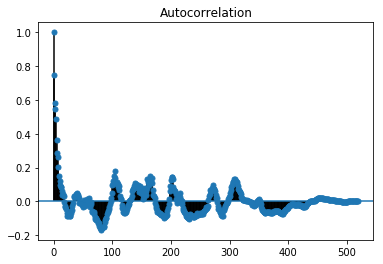

In [6]:
acf_array = acf(SerieTemporalIq['total_cases']) #nlags=40
print(acf_array)

# Plot the acf function
plot_acf(SerieTemporalIq['total_cases'], alpha=1)
plt.show()

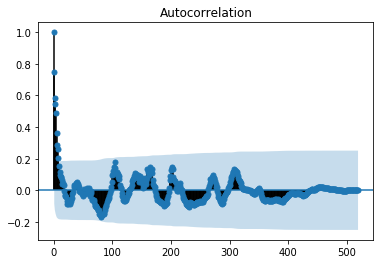

In [7]:
plot_acf(SerieTemporalIq['total_cases'])
plt.show()

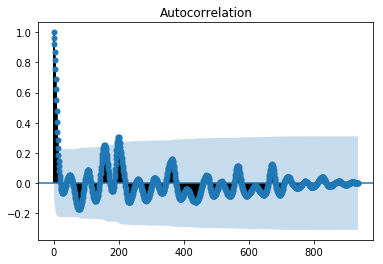

In [8]:
plot_acf(SerieTemporalSj['total_cases'])
plt.show()

In [8]:
# Add a constant to the DataFrame x
#x = sm.add_constant(x)

# Fit the regression of y on x
#result = sm.OLS(y,x).fit()

#print(result.summary())

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess


In [10]:
Sj=SerieTemporalSj['total_cases']
Iq=SerieTemporalIq['total_cases']

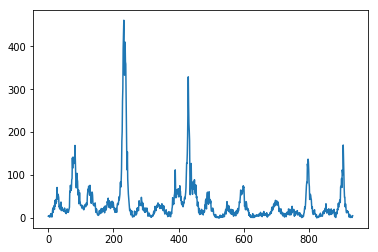

In [29]:
Sj.plot()
plt.show()

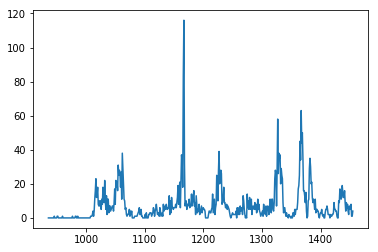

In [30]:
Iq.plot()
plt.show()

In [34]:
SerieTemporalSj.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [6]:
week=[]
year=[]
for i in range(0, len(SerieTemporalSj)):
     week.append(str(SerieTemporalSj['weekofyear'].iloc[i]))
     year.append(str(SerieTemporalSj['year'].iloc[i]))   
week[1]

'19'

In [7]:
data=[]
for i in range(0, len(SerieTemporalSj)):
    data.append(year[i] +' '+week[i]  )


In [8]:
SerieTemporalSj['data']= data


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
SerieTemporalSj['data']= data

for i in range(0, len(SerieTemporalSj)):
    SerieTemporalSj['data'].iloc[i]=datetime.strptime(SerieTemporalSj['data'].iloc[i] + ' 0', "%Y %W %w")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after re

In [17]:
SerieTemporalSj['data']

0      1990-05-06 00:00:00
1      1990-05-13 00:00:00
2      1990-05-20 00:00:00
3      1990-05-27 00:00:00
4      1990-06-03 00:00:00
5      1990-06-10 00:00:00
6      1990-06-17 00:00:00
7      1990-06-24 00:00:00
8      1990-07-01 00:00:00
9      1990-07-08 00:00:00
10     1990-07-15 00:00:00
11     1990-07-22 00:00:00
12     1990-07-29 00:00:00
13     1990-08-05 00:00:00
14     1990-08-12 00:00:00
15     1990-08-19 00:00:00
16     1990-08-26 00:00:00
17     1990-09-02 00:00:00
18     1990-09-09 00:00:00
19     1990-09-16 00:00:00
20     1990-09-23 00:00:00
21     1990-09-30 00:00:00
22     1990-10-07 00:00:00
23     1990-10-14 00:00:00
24     1990-10-21 00:00:00
25     1990-10-28 00:00:00
26     1990-11-04 00:00:00
27     1990-11-11 00:00:00
28     1990-11-18 00:00:00
29     1990-11-25 00:00:00
              ...         
906    2007-10-07 00:00:00
907    2007-10-14 00:00:00
908    2007-10-21 00:00:00
909    2007-10-28 00:00:00
910    2007-11-04 00:00:00
911    2007-11-11 00:00:00
9

In [10]:
Sj=SerieTemporalSj['total_cases']
Iq=SerieTemporalIq['total_cases']

In [14]:
adfuller(Sj)[1]

5.1473186737592894e-09

In [14]:
from statsmodels.tsa.arima_model import ARMA

In [17]:
#print(Sj)
#print(Sj.tolist())


a = np.array(Sj, dtype=np.float64)
#Sj=Sj.tolist()



mod = ARMA(a, order=(1,0))

res = mod.fit()

print(res.summary())



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  936
Model:                     ARMA(1, 0)   Log Likelihood               -3765.730
Method:                       css-mle   S.D. of innovations             13.502
Date:                Fri, 22 Jun 2018   AIC                           7537.460
Time:                        13:06:35   BIC                           7551.985
Sample:                             0   HQIC                          7542.999
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5660     11.977      2.719      0.007       9.092      56.040
ar.L1.y        0.9641      0.008    113.751      0.000       0.948       0.981
                                    Roots           

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


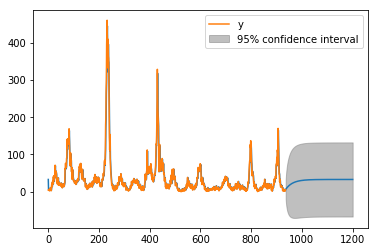

In [14]:
res.plot_predict(start=0, end=1200)
plt.show()

In [15]:
BIC = np.zeros(7)
AIC = np.zeros(7)
for p in range(7):
    mod = ARMA(a, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    AIC[p] = res.aic

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


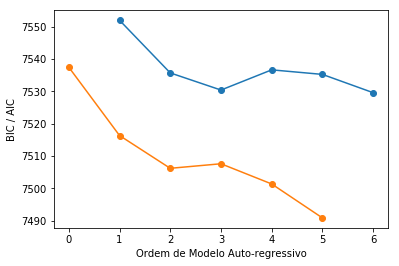

In [16]:
plt.plot(range(1,7), BIC[1:7], AIC[1:7], marker='o')
plt.xlabel('Ordem de Modelo Auto-regressivo')
plt.ylabel('BIC / AIC')
plt.show()

In [23]:
a

array([  4.,   5.,   4.,   3.,   6.,   2.,   4.,   5.,  10.,   6.,   8.,
         2.,   6.,  17.,  23.,  13.,  21.,  28.,  24.,  20.,  40.,  27.,
        42.,  33.,  43.,  37.,  57.,  71.,  44.,  56.,  53.,  52.,  47.,
        26.,  27.,  21.,  21.,  26.,  34.,  37.,  17.,  19.,  25.,  18.,
        21.,  17.,  17.,  16.,  16.,  15.,  23.,  16.,  17.,  12.,  17.,
        10.,  15.,  19.,  21.,  14.,  18.,  13.,  14.,  18.,  23.,  25.,
        62.,  60.,  76.,  66.,  64.,  68.,  89.,  92., 140., 116., 142.,
       129., 140., 140., 127., 129., 169., 141., 108.,  78.,  70.,  81.,
       104.,  90.,  85.,  55.,  53.,  65.,  33.,  38.,  59.,  40.,  37.,
        29.,  30.,  30.,  28.,  23.,  24.,  29.,  26.,  23.,  20.,  19.,
        20.,  26.,  29.,  31.,  28.,  26.,  32.,  35.,  33.,  30.,  52.,
        59.,  67.,  65.,  74.,  70.,  61.,  53.,  76.,  61.,  57.,  44.,
        34.,  47.,  60.,  60.,  53.,  36.,  31.,  30.,  32.,  28.,  33.,
        33.,  35.,  22.,  13.,  13.,  21.,  17.,  1

In [25]:
BIC = np.zeros(shape=(5,5))
AIC = np.zeros(shape=(5,5))
for p in range(5):
    for q in range(5):
        mod = ARMA(a, order=(0,q))
        res = mod.fit()  
        BIC[p][q] = res.bic
        AIC[p][q] = res.aic

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


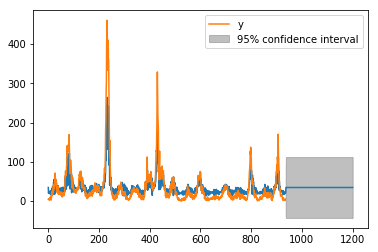

In [17]:
mod = ARMA(a, order=(0,1))
res = mod.fit()
res.plot_predict(start=0, end=1200)
plt.show()

In [18]:
#cointegracao das features?

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

NameError: name 'ETH' is not defined

In [2]:
colunas=train_features.columns

NameError: name 'train_features' is not defined

In [8]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [1]:
Sjfeatures=train_features[train_features['city']=='sj']
Iqfeatures=train_features[train_features['city']=='iq']

NameError: name 'train_features' is not defined

In [29]:
Sjfeatures=Sjfeatures.drop(['city'], axis=1)
Iqfeatures=Iqfeatures.drop(['city'], axis=1)


In [30]:
colunas=colunas.drop('weekofyear')
colunas=colunas.drop('city')
colunas=colunas.drop('year')
colunas=colunas.drop('week_start_date')

In [31]:
colunas


Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [32]:
Sjfeatures=Sjfeatures[colunas]
Iqfeatures=Iqfeatures[colunas]

In [33]:
Sjfeatures=Sjfeatures.apply(lambda x: x.fillna(x.mean()),axis=0)
Iqfeatures=Iqfeatures.apply(lambda x: x.fillna(x.mean()),axis=0)

In [26]:
print(Sjfeatures)

      ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0    0.122600  0.103725  0.198483  0.177617                 12.42   
1    0.169900  0.142175  0.162357  0.155486                 22.82   
2    0.032250  0.172967  0.157200  0.170843                 34.54   
3    0.128633  0.245067  0.227557  0.235886                 15.36   
4    0.196200  0.262200  0.251200  0.247340                  7.52   
5    0.057925  0.174850  0.254314  0.181743                  9.58   
6    0.112900  0.092800  0.205071  0.210271                  3.48   
7    0.072500  0.072500  0.151471  0.133029                151.12   
8    0.102450  0.146175  0.125571  0.123600                 19.32   
9    0.057925  0.121550  0.160683  0.202567                 14.41   
10   0.192875  0.082350  0.191943  0.152929                 22.27   
11   0.291600  0.211800  0.301200  0.280667                 59.17   
12   0.150567  0.171700  0.226900  0.214557                 16.48   
13   0.057925  0.247150  0.379700 

In [34]:
for a in colunas:
    colunas2=colunas.drop(a)
    for b in colunas2:
        # Regress BTC on ETH
        maisconstante = sm.add_constant(Sjfeatures[a])
        otro=Sjfeatures[b].to_frame()
        resultado = sm.OLS(maisconstante.astype(float),otro.astype(float)).fit()
        
    
        kk = resultado.params[1]

        adf_stats = adfuller(otro[otro.columns[0]]-kk.iloc[0]*maisconstante[maisconstante.columns[1]])
        if (abs(adf_stats[1])>0.00005):
            print("a cointegracao entre ",a,"e", b ,"é", adf_stats[1])


a cointegracao entre  ndvi_ne e ndvi_sw é 0.00023278836461853385
a cointegracao entre  ndvi_se e ndvi_ne é 0.0010387529440777344
a cointegracao entre  ndvi_se e ndvi_nw é 0.0014560072912011047
a cointegracao entre  ndvi_sw e ndvi_ne é 0.04409692747064948
a cointegracao entre  ndvi_sw e ndvi_nw é 0.013473949562485555


In [35]:
for a in colunas:
    colunas2=colunas.drop(a)
    for b in colunas2:
        # Regress BTC on ETH
        maisconstante = sm.add_constant(Iqfeatures[a])
        otro=Iqfeatures[b].to_frame()
        resultado = sm.OLS(maisconstante.astype(float),otro.astype(float)).fit()
        
        #print(maisconstante.columns[1])
        #print(otro.columns[0])
    
        kk = resultado.params[1]
        #print(kk.iloc[0])
       # print(kk*maisconstante[maisconstante.columns[1]])
        #print(otro[otro.columns[0]])
        #print(maisconstante[maisconstante.columns[1]])
        adf_stats = adfuller(otro[otro.columns[0]]-kk.iloc[0]*maisconstante[maisconstante.columns[1]])
        if (abs(adf_stats[1])>0.00005):
            print("a cointegracao entre ",a,"e", b ,"é", adf_stats[1])

a cointegracao entre  ndvi_ne e ndvi_nw é 0.00064989870276452
a cointegracao entre  ndvi_ne e ndvi_sw é 0.00021582883590850213
a cointegracao entre  ndvi_nw e ndvi_ne é 0.0007239463871300618
a cointegracao entre  ndvi_sw e ndvi_ne é 0.000228812175038491


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


a cointegracao entre  precipitation_amt_mm e station_precip_mm é 0.0028377436867520344
a cointegracao entre  reanalysis_precip_amt_kg_per_m2 e station_precip_mm é 0.013676990276879755
a cointegracao entre  reanalysis_sat_precip_amt_mm e station_precip_mm é 0.0028377436867520344
a cointegracao entre  station_precip_mm e reanalysis_relative_humidity_percent é 0.004633621720142705


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [37]:
modelo = PCA()

scaler = StandardScaler()


pca = PCA()

pipeline = make_pipeline(scaler,pca)

pipeline.fit(Iqfeatures)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

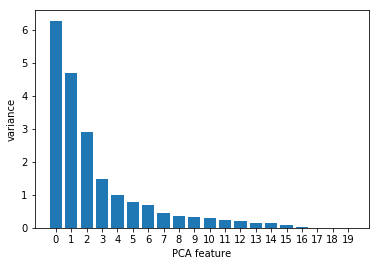

In [38]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [39]:
modelo = PCA()

scaler = StandardScaler()


pca = PCA()

pipeline = make_pipeline(scaler,pca)
/
pipeline.fit(Sjfeatures)



Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

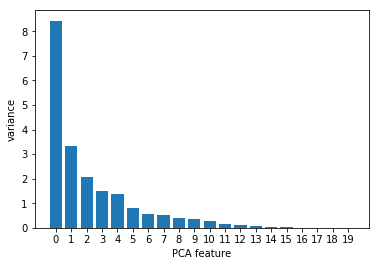

In [40]:



features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,...,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,...,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


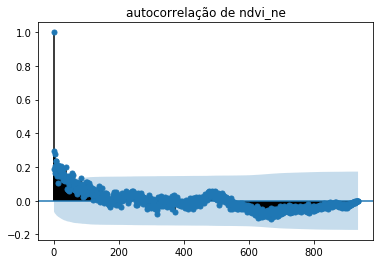

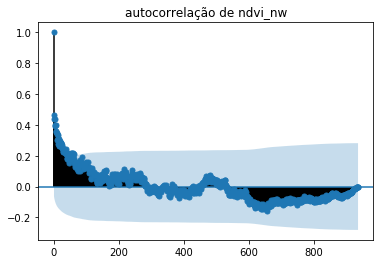

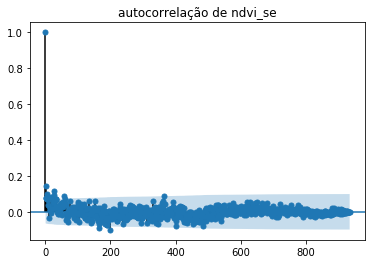

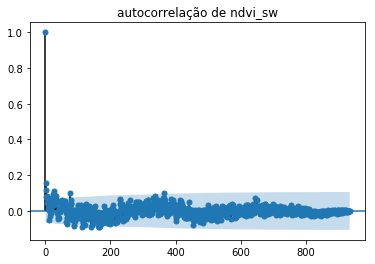

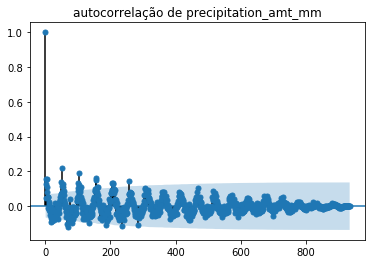

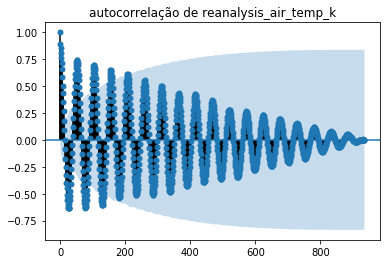

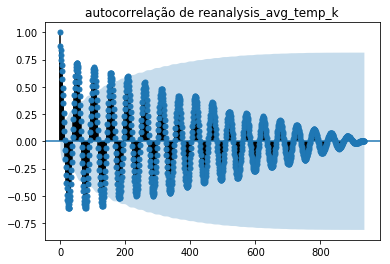

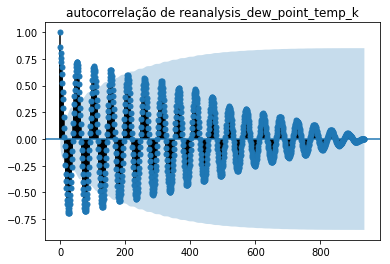

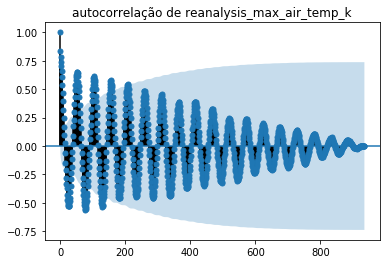

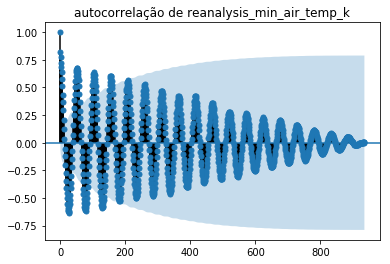

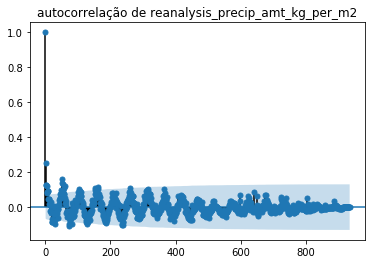

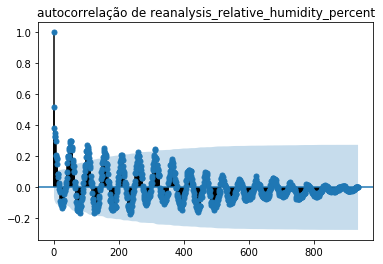

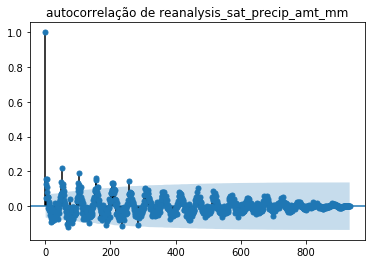

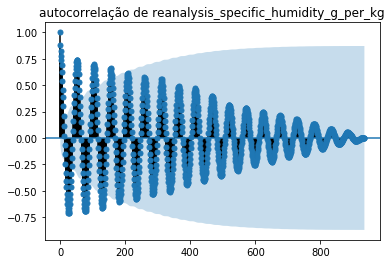

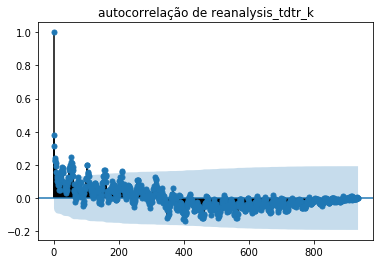

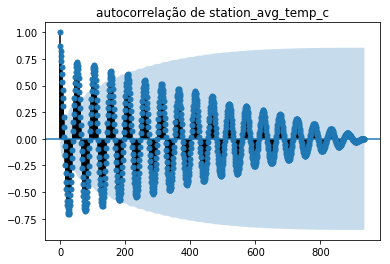

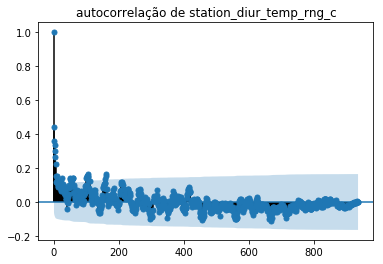

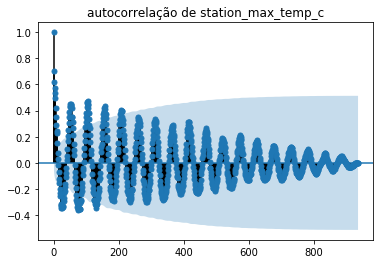

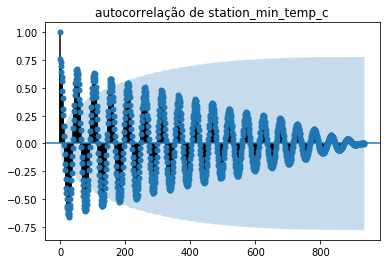

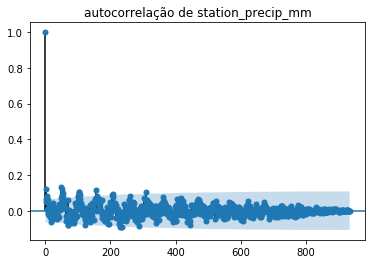

In [41]:
for a in colunas:
    plot_acf(Sjfeatures[a], title='autocorrelação de '+ a  )
plt.show()

In [42]:
colunas

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [43]:
# TEMPERATURAS

temperaturas= ['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
               'station_min_temp_c','reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
               'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
               'reanalysis_min_air_temp_k']
    
# NDVI    

ndvi=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']


# PRECIPITACAO

precipitacao=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2']

# UMIDADE

umidade=['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']

(9,)
(9, 936)


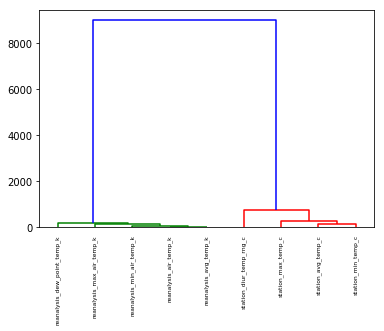

In [52]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

#print(Sjfeatures[temperaturas])

Sjtemperaturas=Sjfeatures[temperaturas].values

Sjtemperaturas=np.transpose(Sjtemperaturas)

mergings = linkage(Sjtemperaturas, method='complete')

print(np.shape(temperaturas))
print(np.shape(Sjtemperaturas))


# Plot the dendrogram
dendrogram(mergings, labels=temperaturas, leaf_rotation=90, leaf_font_size=6)
plt.show()


(9,)
(9, 936)


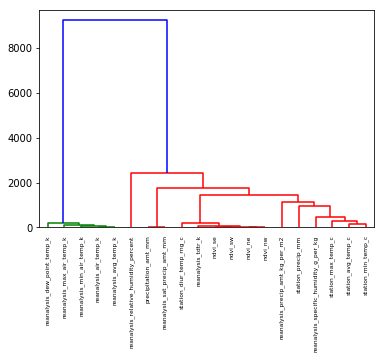

In [53]:
#print(Sjfeatures[temperaturas])

Sjfeatdendrograma=Sjfeatures.values

Sjfeatdendrograma=np.transpose(Sjfeatdendrograma)

mergings = linkage(Sjfeatdendrograma, method='complete')

print(np.shape(temperaturas))
print(np.shape(Sjtemperaturas))


# Plot the dendrogram
dendrogram(mergings, labels=colunas, leaf_rotation=90, leaf_font_size=6)
plt.show()



In [55]:

from sklearn.preprocessing import normalize

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

In [1]:
#The p-value roughly indicates the probability of an 
# uncorrelated system producing datasets that have a Pearson correlation 
#at least as extreme as the one computed from these datasets. 
#The p-values are not entirely reliable but are probably reasonable for datasets 
#larger than 500 or so.

for p in colunas:
    colunai=colunas.drop(p)
    for q in colunai:
        corrpearson=pearsonr(Sjfeatures[p], Sjfeatures[q])
        #print(pearsonr(Sjfeatures[p], Sjfeatures[q]))
        if abs(corrpearson[0])>0.8:
            print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

NameError: name 'colunas' is not defined

imputar features médias das semanas (temos vários anos!) (se pá modelar com arima as sequencias para imputar!)

tirar os correlacionadas coma variancia do PCA depois da imputacao!


Expectation optimization!

restricted boltzmann machine (Rbm)

In [7]:
from statsmodels.tsa.arima_model import ARMA

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
colunas=train_features.columns
colunas=colunas.drop(['city','week_start_date','year'])


colunasi=colunas.drop('weekofyear')

In [6]:
mod=ARMA(train_features[colunasi[2]],order=(1,1))

NameError: name 'ARMA' is not defined

In [8]:
#para fazer a imputacao

BIC = np.zeros(shape=(5,5))
AIC = np.zeros(shape=(5,5))
for j in colunas:
    for p in range(5):
        for q in range(5):
            mod = ARMA(train_features[j], order=(p,q))
            res = mod.fit()  
            BIC[p][q] = res.bic
            AIC[p][q] = res.aic
            

ValueError: Given a pandas object and the index does not contain dates

In [ ]:
mod = ARMA(train_features[''], order=(p,q))